# Определение перспективного тарифа для телеком-компании

## Описание проекта:

C корректировки рекламного бюджета компании необходимо провести исследование клиентских данных и определить наиболее выгодный тариф для продвижения.


**Тариф «Смарт»**
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей


**Тариф «Ультра»**
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

## Содержание:
* [1.Общая информация о данных.](#section_1)
    * [1.1 Звонки](#section_1_1)
    * [1.2 Интернет](#section_1_2)
    * [1.3 Сообщения](#section_1_3)
    * [1.4 Тарифы](#section_1_4)
    * [1.5 Пользователи](#section_1_5)
    * [1.6 Вывод](#section_1_6)
* [2. Подготовка данных.](#section_2)
    * [2.1 Изменение типа данных](#section_2_1)
    * [2.2 Округление значений в зависимости от тарифа](#section_2_2)
    * [2.3 Преобразование датасета](#section_2_3)
    * [2.4 Расчет прибыли](#section_2_4)
    * [2.5 Вывод](#section_2_5)
* [3. Анализ данных.](#section_3)
    * [3.1 Продолжительность звонков.](#section_3_3)
    * [3.2 Количество СМС](#section_3_4)
    * [3.3 Интернет трафик](#section_3_5)
    * [3.4 Вывод](#section_3_6)
* [4.Проверка гипотез.](#section_4)
    * [4.1 Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.](#section_4_1)
    * [4.2 Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.](#section_4_2)
* [5.Общий вывод.](#section_5)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
pd.options.display.max_columns = None
from scipy import stats as st
from scipy.stats import levene


## 1. Общая информация о данных.<a class="anchor" id="section_1">

In [2]:
# df_calls = pd.read_csv(r"C:\Users\79520\Desktop\Project 3 Megaline\calls.csv")
# df_internet = pd.read_csv(r"C:\Users\79520\Desktop\Project 3 Megaline\internet.csv")
# df_messages = pd.read_csv(r"C:\Users\79520\Desktop\Project 3 Megaline\messages.csv")
# df_tariffs = pd.read_csv(r"C:\Users\79520\Desktop\Project 3 Megaline\tariffs.csv")
# df_users = pd.read_csv(r"C:\Users\79520\Desktop\Project 3 Megaline\users.csv")

df_calls = pd.read_csv(r"/datasets/calls.csv") # код ревьюера
df_internet = pd.read_csv(r"/datasets/internet.csv") # код ревьюера
df_messages = pd.read_csv(r"/datasets/messages.csv") # код ревьюера
df_tariffs = pd.read_csv(r"/datasets/tariffs.csv") # код ревьюера
df_users = pd.read_csv(r"/datasets/users.csv") # код ревьюера

### 1.1. Звонки<a class="anchor" id="section_1_1">

In [3]:
print(df_calls.info())
print('Количество дубликатов', df_calls.duplicated().sum())
print(df_calls.describe())
df_calls.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
Количество дубликатов 0
            duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max        38.000000    1499.000000


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


В данных нет пропусков и дубликатов. Необходимые для обработки признаки: нелевые значения в длительности, и формат даты. Нулевые значения не вижу смысла заменять на отрицательные т.к., предположим, что это недозоны до абонента, информация о которых может понадобится в дальнейшем.Изменение формата даты отложим на другой шаг, т.к. есть предположение, что проблема типична и проще будет сделать замену вормата для всех датасетов в цикле.

### 1.2. Интернет<a class="anchor" id="section_1_2">

In [4]:
print(df_internet.info())
print('Количество дубликатов', df_internet.duplicated().sum())
print(df_internet.describe())
df_internet.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None
Количество дубликатов 0
          Unnamed: 0        mb_used        user_id
count  149396.000000  149396.000000  149396.000000
mean    74697.500000     370.192426    1252.099842
std     43127.054745     278.300951     144.050823
min         0.000000       0.000000    1000.000000
25%     37348.750000     138.187500    1130.000000
50%     74697.500000     348.015000    1251.000000
75%    112046.250000     559.552500    1380.000000
max    149395.000000    1724.830000    1499.000000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [5]:
# удалим нлишний столбец, дублирующий часть id
df_internet = df_internet.drop(['Unnamed: 0'], axis = 'columns')
df_internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


В данных так же нет дубликатов и пропусков. Ненужный столбец удалили, формат даты изменим в цикле на другом шаге.

### 1.3. Сообщения<a class="anchor" id="section_1_3">

In [6]:
print(df_messages.info())
print('Количество дубликатов', df_internet.duplicated().sum())
print(df_messages.describe())
df_messages.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
Количество дубликатов 0
             user_id
count  123036.000000
mean     1256.989410
std       143.523967
min      1000.000000
25%      1134.000000
50%      1271.000000
75%      1381.000000
max      1499.000000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


В данных по количеству смс нет пропусков и нулевых значений, формат даты изменим при подготовке данных.

### 1.4. Тарифы<a class="anchor" id="section_1_4">

In [7]:
print(df_tariffs.info())
print('Количество дубликатов', df_tariffs.duplicated().sum())
print(df_tariffs.describe())
df_tariffs.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None
Количество дубликатов 0
       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000           15360.000000        500.000000   
25%           287.500000           19200.000000       1125.000000   
50%           525.000000           23040.000000       1750.000000

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В данных представлена информациия о тарифах, изменений не требуется.

### 1.5. Пользователи<a class="anchor" id="section_1_5">

In [8]:
print(df_users.info())
print('Количество дубликатов', df_users.duplicated().sum())
print(df_users.describe())
df_users.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
Количество дубликатов 0
           user_id        age
count   500.000000  500.00000
mean   1249.500000   46.58800
std     144.481833   16.66763
min    1000.000000   18.00000
25%    1124.750000   32.00000
50%    1249.500000   46.00000
75%    1374.250000   62.00000
max    1499.000000   75.00000


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


В данных представлена информация о пользователях. Есть большое количество пропущенных значений в информации о дате прекращения использования тарифа. На данном этапе каким- либо образом заменять не считаю целесообразным, возможна замена в дальнейшем, если того будет требовать текущая задача.

### 1.6. Вывод.<a class="anchor" id="section_1_6">

Ознакомившись с данными выяснилось, что большинство хранят данные для одних и тех же пользователя, считаю целесообразным объеденит фреймы по пользовательскому id, для упрощения работы в дальнейшем. Так же, было выявлено, что большинство полей с данными о дате имеют не подходящий формат, необходима замена. Так т.к. данные представлены реальными показателями, необходимо округление в зависимости от тарифо.


## 2. Подготовка данных<a class="anchor" id="section_2">
    
Исходя из выявленных особенностей и целей проекта на данном этапе предстоит решить следующие задачи:
    
* Изменить формат дат во всех полях с датой.
* Округлить данные в зависимости от условий, представленных в тарифах 
* Сгруппировать и преобразовать данные в одинт датасет для удобства
* Добавить новые поля с прибылью 

### 2.1. Изменение типа данных.<a class="anchor" id="section_2_1">

In [9]:
# заменяем формат времени на корректный
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])


### 2.2.Округление значений в зависимости от тарифа.<a class="anchor" id="section_2_2">

In [10]:
# исходя их параметров тарифа окгруглим количество минут и мегабайт до корректного значения
df_calls['duration'] = df_calls['duration'].apply(np.ceil)

# Мб сразц переводив Гб
df_internet['mb_used'] = (df_internet['mb_used']).apply(np.ceil)



### 2.3.Преобразование датасета<a class="anchor" id="section_2_3">

In [11]:
# создадим отдельные поля с меесяцем для каждого источника трафика чтобы вывести имя можно использовать _name
df_calls['month'] = df_calls['call_date'].dt.month
df_messages['month'] = df_messages['message_date'].dt.month
df_internet['month'] = df_internet['session_date'].dt.month

# группирует данные посредством сводных таблиц
df_calls_agg = df_calls.pivot_table(values = 'duration', index = ['user_id', 'month'], aggfunc = ('count', 'sum'))
df_message_date_agg = df_messages.pivot_table(values = 'id', index = ['user_id','month'], aggfunc = ('count'))
df_internet_agg = df_internet.pivot_table(values = 'mb_used', index = ['user_id','month'], aggfunc = ('sum'))

# переименуем столбцы
df_calls_agg.columns = ['number_calls','all_duration']
df_message_date_agg.columns = ['number_messages']
df_internet_agg.columns = ['all_traffic']

#объединяем сводные таблицы,с методом merge используем параметр 'outer', для того чтобы учесть id из всех датасетов  
df_all_traff = df_calls_agg.merge(df_message_date_agg, on= ['user_id', 'month'], how = 'outer')
df_all_traff = df_all_traff.merge(df_internet_agg, on = ['user_id', 'month'], how = 'outer')
df_all_traff.reset_index(inplace = True)
df_all_traff = df_users.merge(df_all_traff, on = 'user_id', how = 'outer')

#бросаются в глаза float там где их быть не должно, но менять пока не будем 
# т.к.пришлось бы заменять nan -ы, которые еще могут понадобится
# так же присоеденим данный о тарифах, переименовав полем'tariff'
df_all_traff = df_all_traff.rename(columns={'tariff': 'tariff_name'})
df_all_traff = df_all_traff.merge(df_tariffs, on = 'tariff_name', how = 'outer')

#полуилось два пропуска с данными о месяце, для того чтобы преобразовать данные в int, удалим строки с пропусками в 'month'
df_all_traff.dropna(subset = ['month'], inplace = True)
df_all_traff['month'] = df_all_traff['month'].astype('int64')

df_all_traff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3215
Data columns (total 20 columns):
user_id                  3214 non-null int64
age                      3214 non-null int64
churn_date               187 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff_name              3214 non-null object
month                    3214 non-null int64
number_calls             3174 non-null float64
all_duration             3174 non-null float64
number_messages          2717 non-null float64
all_traffic              3203 non-null float64
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_m

### 2.4. Расчет прибыли компании<a class="anchor" id="section_2_4">

In [12]:
# прежде чем рассчитывать прибыль, заменим отсутвующие значения на '0'
df_all_traff['all_duration'] = df_all_traff['all_duration'].fillna(0)
df_all_traff['number_messages'] = df_all_traff['number_messages'].fillna(0)
df_all_traff['all_traffic'] = df_all_traff['all_traffic'].fillna(0)/1024

# перевод МБ в ГБ
df_all_traff['mb_per_month_included'] = df_all_traff['mb_per_month_included']/1024

#опрделим функцию для подсчета прибыли
prof_traff = 0
prof_min = 0
prof_messages = 0

def function(row):
    if row['all_duration'] <= row['minutes_included']:
        prof_min = 0
    else:
        prof_min = (row['all_duration'] - row['minutes_included']) * row['rub_per_minute']
    
    if row['number_messages'] <= row['messages_included']:
        prof_messages = 0
    else:
        prof_messages = (row['number_messages'] - row['messages_included']) * row['rub_per_message']  
    
    if row['all_traffic'] <= row['mb_per_month_included']:
        prof_traff = 0
    else:
        prof_traff = (row['all_traffic'] - row['mb_per_month_included']) * row['rub_per_gb']
    
    prof_all = prof_min + prof_messages + prof_traff + row['rub_monthly_fee']   
    return prof_all
# применим функцию к фрейму, добавим новый столбец
df_all_traff['profit'] = df_all_traff.apply(function, axis=1)
df_all_traff

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,month,number_calls,all_duration,number_messages,all_traffic,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,22.0,159.0,22.0,2.203125,1000,30.0,3000,1950,150,1,1,1950.000000
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,43.0,172.0,60.0,22.711914,1000,30.0,3000,1950,150,1,1,1950.000000
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,47.0,340.0,75.0,13.687500,1000,30.0,3000,1950,150,1,1,1950.000000
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,52.0,408.0,81.0,13.740234,1000,30.0,3000,1950,150,1,1,1950.000000
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,58.0,466.0,57.0,14.239258,1000,30.0,3000,1950,150,1,1,1950.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,41.0,247.0,42.0,20.121094,50,15.0,500,550,200,3,3,1574.218750
3212,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,9.0,70.0,11.0,1.804688,50,15.0,500,550,200,3,3,550.000000
3213,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,10,68.0,449.0,48.0,17.391602,50,15.0,500,550,200,3,3,1028.320312
3214,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,11,74.0,612.0,59.0,17.562500,50,15.0,500,550,200,3,3,1425.500000


### 2.5. Вывод.<a class="anchor" id="section_2_5">

На данном этапе дынные были польностью подготовлены для последующего анализа:
 * изменены форматы даты
 * подготовлен сгруппированный фрейм из нескольких датасетов
 * с помощью функции подсчитана прибылль для каждого месяца

## 3. Анализ данных <a class="anchor" id="section_3">

### 3.1. Продолжительность звонков.<a class="anchor" id="section_3_3">

In [13]:
#выделим потдельные фреймы по тарифам
df_smart = df_all_traff[df_all_traff['tariff_name'] == 'smart']
df_ultra = df_all_traff[df_all_traff['tariff_name'] == 'ultra']

In [14]:
#установим размер для отображения всех последующих графиков
sns.set(rc={'figure.figsize':(15,7)}, color_codes=True)

In [40]:
print('Тариф "Смарт"')
print('Средняя продолжительность звонков по тарифу "смарт":{:.2f}'.format(df_smart['all_duration'].mean()))
print('Дисперсия продолжительности звонков "смарт":{:.2f}'.format(np.var(df_smart['all_duration'], ddof=1)))
print('Стандартное продолжительности звонков "смарт":{:.2f}'.format(np.std(df_smart['all_duration'])))
print('-----------------------------------------------------------------')
print('Тариф "Ультра"')
print('Среднее продолжительности звонков "ультра":{:.2f}'.format(df_ultra['all_duration'].mean()))
print('Дисперсия продолжительности звонков "ультра":{:.2f}'.format(np.var(df_ultra['all_duration'], ddof=1)))
print('Стандартное отклонение продолжительности звонков по тарифу "ультра":{:.2f}'.format(np.std(df_ultra['all_duration'])))

Тариф "Смарт"
Средняя продолжительность звонков по тарифу "смарт":417.93
Дисперсия продолжительности звонков "смарт":36219.32
Стандартное продолжительности звонков "смарт":190.27
-----------------------------------------------------------------
Тариф "Ультра"
Среднее продолжительности звонков "ультра":526.62
Дисперсия продолжительности звонков "ультра":100873.63
Стандартное отклонение продолжительности звонков по тарифу "ультра":317.44


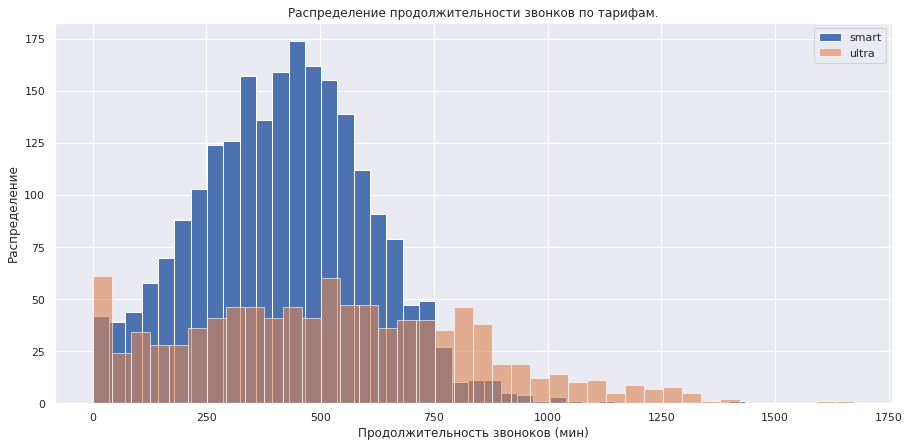

In [16]:
plt.hist(df_smart['all_duration'], bins = 40, label= 'smart')
plt.hist(df_ultra['all_duration'], bins = 40, alpha = 0.6, label= 'ultra')

plt.xlabel('Продолжительность звоноков (мин)')
plt.ylabel('Распределение')
plt.title('Распределение продолжительности звонков по тарифам.')
plt.legend(loc='upper right')
plt.show()

Стандартное отклонение для тарифов "смарт":190.43, "ультра":317.73.
На гистограмме можем визуально ознакомится с этим расхождением. 

Если также взять во внимание среднее значение по продолжительности звонков : "ультра":526.09, "смарт":417.75, можно следующим образом описать поведение пользователей:

Абоненты тарифа 'смарт' в большей степени ограничивают время разговора, основная часть звонков расположена в интервале 250 -600 мин. в месяц. Данная особенность связаны с тарифным ограничением. 

Абоненты тарифа 'Ультра' в меньшей степени ограничивают продолжительность звонков, с этим связано большее распределение признака, о чем прежде всего говорит отличающееся в 1.5 раза стандартное отклонение. 
Особенность связана с большИм количеством бесплатных минут - 3000 мин. для тарифа 'ултра' против 500 для тарифа 'смарт'.

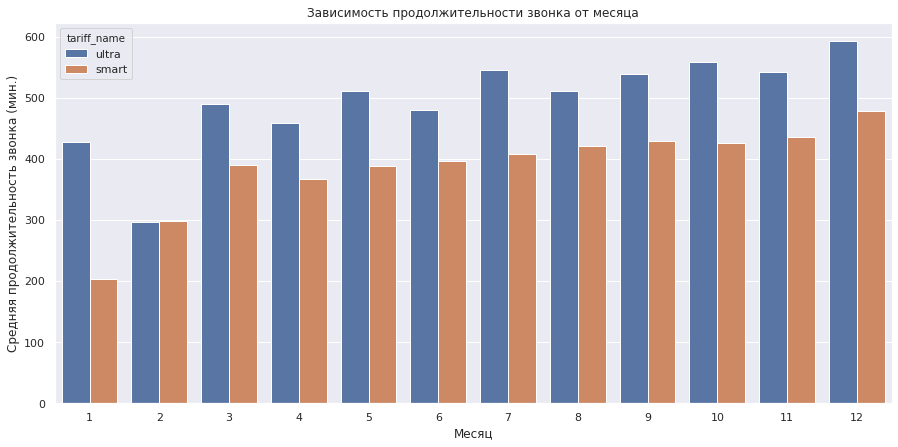

In [17]:
# графики зависимости продолжительности минут и месяца по тарифам
# построим график зависимости продолжительности звонка от месяца

ax = sns.barplot(x = 'month', y = 'all_duration', data = df_all_traff, ci = False, hue = 'tariff_name')
plt.xlabel('Месяц')
plt.ylabel('Средняя продолжительность звонка (мин.)')
plt.title('Зависимость продолжительности звонка от месяца')
plt.show()


График звисимости продолжительности звонков от месяца для двух тарифов можнет говорит о следующем:
* в течении года имеет место небольшой линейный рост в количестве потраченных минут для обоих тарифов
* в среднем пользователи тарифа 'ультра' тратят больше минут
* абоненты тарифа 'ультра' в следующем месяце тратят больше чем, впредыдущем, распределение скорее случайно, связано с большим количеством бесплатных минут, и отсутвием необходимости контролировать этот показатель
* Самый минимальный по продолжительности раговорв месяц для обоих тарифов  - Январь, максимальный - Декабрь.

### 3.2. Количество СМС.<a class="anchor" id="section_3_4">

In [38]:
#общая информация по количеству смс для обеих тарифов
print('Тариф "Смарт"')
print('Среднее количество СМС по тарифу "смарт":{:.2f}'.format(df_smart['number_messages'].mean()))
print('Дисперсия количество СМС по тарифу "смарт":{:.2f}'.format(np.var(df_smart['number_messages'], ddof=1)))
print('Стандартное отклонение количество СМС по тарифу "смарт":{:.2f}'.format(np.std(df_smart['number_messages'])))
print('-----------------------------------------------------------------')
print('Тариф "Ультра"')
print('Среднее количество СМС по тарифу "ультра":{:.2f}'.format(df_ultra['number_messages'].mean()))
print('Дисперсия количество СМС по тарифу "ультра":{:.2f}'.format(np.var(df_ultra['number_messages'], ddof=1)))
print('Стандартное отклонение количество СМС по тарифу "ультра":{:.2f}'.format(np.std(df_ultra['number_messages'])))


Тариф "Смарт"
Среднее количество СМС по тарифу "смарт":33.38
Дисперсия количество СМС по тарифу "смарт":796.81
Стандартное отклонение количество СМС по тарифу "смарт":28.22
-----------------------------------------------------------------
Тариф "Ультра"
Среднее количество СМС по тарифу "ультра":49.36
Дисперсия количество СМС по тарифу "ультра":2285.27
Стандартное отклонение количество СМС по тарифу "ультра":47.78


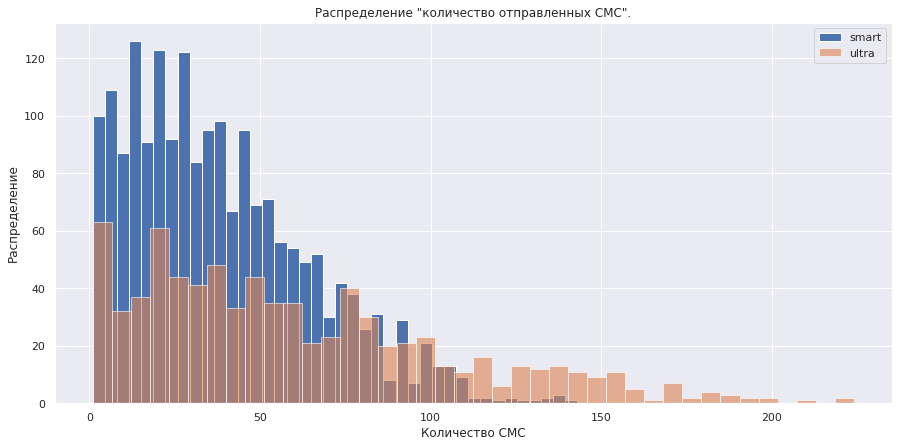

In [39]:
#при построении гистограммы не учитфваем нулевые значения
plt.hist(df_smart[df_smart['number_messages']!= 0]['number_messages'], bins = 40, label= 'smart')
plt.hist(df_ultra[df_ultra['number_messages']!= 0]['number_messages'], bins = 40, alpha = 0.6, label= 'ultra')
plt.xlabel('Количество СМС')
plt.ylabel('Распределение')
plt.title('Распределение "количество отправленных СМС".')
plt.legend(loc='upper right')
plt.show()

# df_smart[df_smart['number_messages']!= 0]['number_messages']
# df_ultra[df_ultra['number_messages']!= 0]['number_messages']

Из гистограммы видим, что ситуация практически аналогиченая с продолжительностью звонков. Абоненты тарифа 'Ультра' отправляют с среднем больше смс и их количество распределено намного более разнообразно в отличие от пользователей тарифа 'Смарт'. 
Причина та же - в тарифе 'ультра' большой порого СМС входящих в тариф.

Стандартное отклонение по количеству смс для тарифа 'ультра' больше в 1.7 раза.

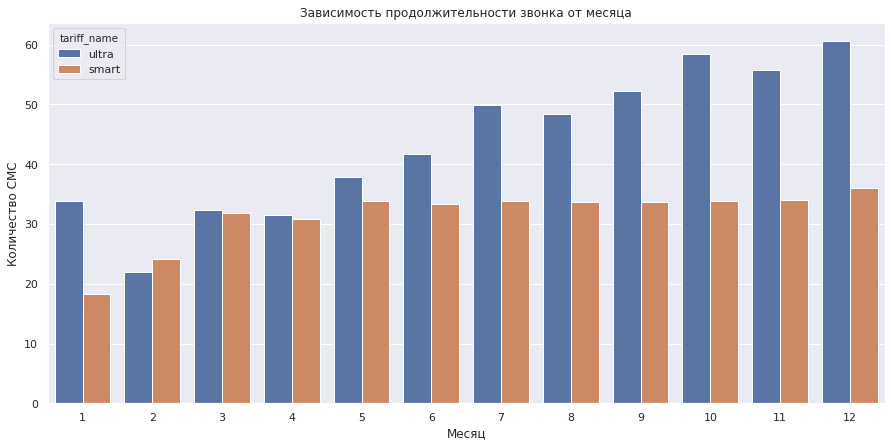

In [20]:
# графики зависимости количества смс в месяц по тарифам
# построим график зависимости продолжительности звонка от месяца
sns.barplot(x = 'month', y = 'number_messages', data = df_all_traff, ci = False, hue = 'tariff_name')
plt.xlabel('Месяц')
plt.ylabel('Количество СМС')
plt.title('Зависимость продолжительности звонка от месяца');
plt.show()

Из графика можем увидеть, что абоненты тарифа 'ультра' отправляют смс значительно чаще, причем количество смс возрастает в течении года, абоненты тарифа 'смарт' практически всегда отправляют одно и тоже количество смс- около 35.

### 3.3. Интернет трафик.<a class="anchor" id="section_3_5">

In [21]:
# общая информация по интернет трафику
print('Тариф "Cмарт"')
print('Среднее количество трафика по тарифу "смарт":{:.2f}'.format(df_smart['all_traffic'].mean()))
print('Дисперсия трафика по тарифу "смарт":{:.2f}'.format(np.var(df_smart['all_traffic'], ddof=1)))
print('Стандартное отклонение трафика по тарифу "смарт":{:.2f}'.format(np.std(df_smart['all_traffic'])))
print('--------------------------------------------------------')
print('Тариф "Ультра"')
print('Среднее количество трафика по тарифу "ультра":{:.2f}'.format(df_ultra['all_traffic'].mean()))
print('Дисперсия трафика по тарифу "ультра":{:.2f}'.format(np.var(df_ultra['all_traffic'], ddof=1)))
print('Стандартное отклонение трафика по тарифу "ультра":{:.2f}'.format(np.std(df_ultra['all_traffic'])))


Тариф "Cмарт"
Среднее количество трафика по тарифу "смарт":15.85
Дисперсия трафика по тарифу "смарт":32.95
Стандартное отклонение трафика по тарифу "смарт":5.74
--------------------------------------------------------
Тариф "Ультра"
Среднее количество трафика по тарифу "ультра":19.03
Дисперсия трафика по тарифу "ультра":97.21
Стандартное отклонение трафика по тарифу "ультра":9.85


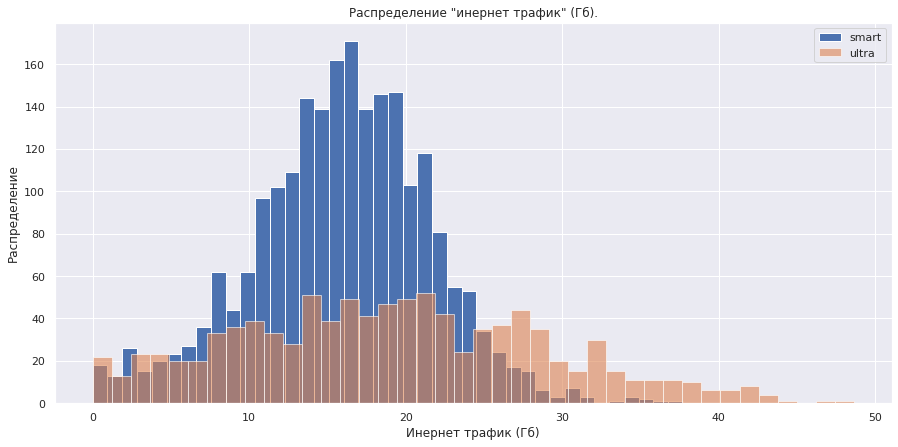

In [22]:
plt.xlabel('Инернет трафик (Гб)')
plt.ylabel('Распределение')
plt.title('Распределение "инернет трафик" (Гб).')
plt.hist(df_smart['all_traffic'], bins = 40, label= 'smart')
plt.hist(df_ultra['all_traffic'], bins = 40, alpha = 0.6, label= 'ultra')
plt.legend(loc='upper right')
plt.show()

По количеству потраченного трафика тарифы меньше всего различаются в распредении показателя, стандартное отклонение по тарифу "смарт":5.74 и 9.8 по тарифу 'смарт', по среднему количеству тариф 'ультра' так же имеет небольшой перевес 19.03 Гб против 15.85.

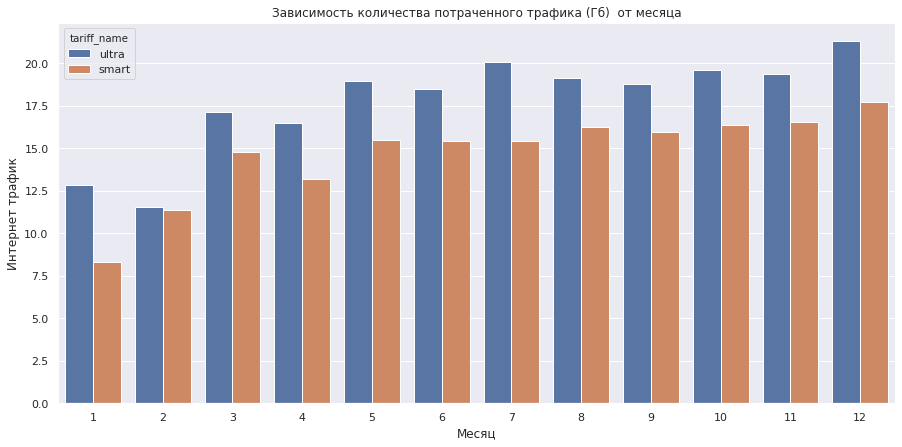

In [23]:
#sns.lineplot(x = 'month', y = 'all_traffic', data = df_all_traff, ci = False, hue = 'tariff_name', style='tariff_name', markers = True )
sns.barplot(x = 'month', y = 'all_traffic', data = df_all_traff, ci = False, hue = 'tariff_name')

plt.xlabel('Месяц')
plt.ylabel('Интернет трафик')
plt.title('Зависимость количества потраченного трафика (Гб)  от месяца');
plt.show()

Как и для продолжительности звонков, характерно, что количество потраченнго трафика для обоих тарифов максимально в декабре и минимально в январе.

### 3.4. Вывод<a class="anchor" id="section_3_6">

Имходя из проведенного анализа можно утверждать, что пользователи тарифа 'Ультра' в гораздо меньшей степени заботятся о количестве потраченных минут, смс, и Гб интернет трафика. Особенно это справедливо для первых двух показателей. Об этом нам говорит стандартное отклонение, распределение смещенное вправо по первым двум пунктам. 


## 4. Проверка гипотез.<a class="anchor" id="section_4">

### 4.1. Гипотеза о равенстве вуручки.<a class="anchor" id="section_4_1">


<div class="alert alert-block alert-info">
<b>Гипотезы сформулировал.
 </b>
</div>

Сформулируем гипотезы:

Нулевая гипотеза  - Средняя выручка пользователей тарифов «Ультра» равна средней выручке пользователей тарифа «Смарт».
Альтернативная гипотеза - Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается .

In [24]:
# определим выборки
ultra_prof_list  = df_ultra['profit']
smart_prof_list  = df_smart['profit']

#для определения корректного параметра equal_var прежде чем применять Т - критерий Стьюдента сравним 
#дисперсии по имеющимся выборкам, используем параметр ddof=1 т.к. подсчет не по генеральной совокупности

print('Показатель дисперсии для выручки по тарифу "УЛЬТРА"',np.var(df_ultra['profit'], ddof=1))
print('Показатель дисперсии для выручки по тарифу "СМАРТ"',np.var(df_smart['profit'], ddof=1))

Показатель дисперсии для выручки по тарифу "УЛЬТРА" 126953.2854599396
Показатель дисперсии для выручки по тарифу "СМАРТ" 620452.6075337975


Получаем разные показателеи дисперсий по выборкам, так же перепроверим равенство с исполльзованием теста Левене.

In [25]:
stat, p = levene(df_ultra['profit'], df_smart['profit'])
p

3.137244045710333e-115

Результат по тесту Левене превышает 0,05.
Это говорит нам о том, что дисперсии не гомогенны, при проверке не может быть использован Т-тест Стьюдента. 

In [31]:
#для проверки гипотез будет использован t-критерий Уэлча, для этого укажем параметра equal_var = False

alpha = 0.01

results = st.ttest_ind(
    smart_prof_list,
    ultra_prof_list,
    equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 8.931402711366754e-296
Отвергаем нулевую гипотезу


Для проверки гипотезы о равенстве двух генеральных совокупностей применяем метод scipy.stats.ttest_ind. Критический уровень статистической значимости установили равным 0.01. 

p - значения оказалось гораздо меньш, гипотеза отвергнуты.

Вывод: средняя выручка пользователей тарифов 'Ультра' и 'Смарт' отличаются.

### 4.2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.<a class="anchor" id="section_4_2">


Сформулируем гипоте:

Нулевая гипотеза  - Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов
Альтернативная гипотеза  - Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [37]:
# попределим фреймы и так же проверим равеноство дисперсий с помощью  теста Левене
df_moscow = df_all_traff[df_all_traff['city'] == 'Москва']['profit']
df_region = df_all_traff[df_all_traff['city'] != 'Москва']['profit']

stat, p = levene(df_ultra['profit'], df_smart['profit'])
p

3.137244045710333e-115

In [35]:
#дисперсии не равны, поэтому так же используем параметр equal_var = False

alpha = 0.05

results = st.ttest_ind(
    df_moscow,
    df_region,
    equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 0.4549775646471024
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.
Для проверки гипотезы используем тот же критерий.
В данном случае гипотезу отвергунть не получилось, т.е. нулевая гипотеза верна.

Вывод: Верно, что средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

## 5. Общий вывод.<a class="anchor" id="section_5">

В ходе исследования было изучено поведение пользователей разных тарифов. 
Для этого была проведена работа по очистке и преобразованию данных, из подготовленных данных собран фрейм с необходимыми полями для анализы.

Была подсчитана выручка по тарифам, проанализировно распределение по количеству звонков, смс, интернет трафика для каждого тарифа.
Проверены гипотезы о равенстве средней выручки поользователей.

Из полученных результатов можно заключить, что пользователи тарифа 'ультра' расходуют большее количество звонков и СМС  и ГБ интернет трайика. Особенность связана с большим пороговым значением по тарифу. Такие выводы были сделаны на основании сравнения показателей средних отклонений по анализируемым категориям. 

Полученные наблюдения говорят о том, что тариф 'Ультра' является более перспективным для продвижения.